### This notebook loads labels from crowdai's dataset and prepares cropped/resized images from unique labels to augment the project dataset


In [1]:
# Augment data using car images from crowai's database
from csv import DictReader
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

reader = DictReader(open(r'C:\Users\mohar\Desktop\Udacity\object-detection-crowdai\object-detection-crowdai\car_labels.csv'))

dataset = {} # create an empty dict to hold bounding boxes and filenames
for row in reader:
    for column, value in row.items():
        dataset.setdefault(column, []).append(value)

print(dataset.keys()) # show dict keys
print(len(dataset['Frame'])) # number of unique frames

dict_keys(['xmin', 'xmax', 'ymax', 'Frame', 'ymin'])
9217


(1920, 1200)
(953, 556, 1017, 617)


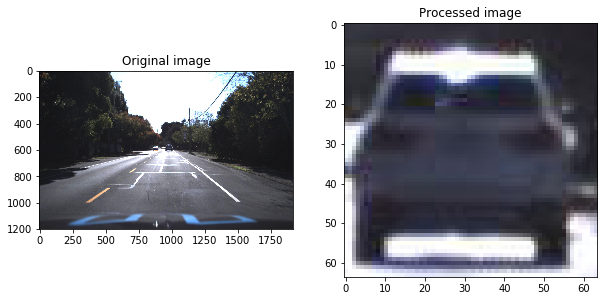

In [2]:
from PIL import Image

# check the pipeline on test image
index = np.random.randint(0, len(dataset['Frame']))
path = 'C:/Users/mohar/Desktop/Udacity/object-detection-crowdai/object-detection-crowdai/' + \
dataset['Frame'][index]
img = Image.open(path)
f, ax = plt.subplots(1, 2, figsize = (10, 20))
ax[0].imshow(img)
ax[0].set_title('Original image')
print(img.size)
bbox = dataset['xmin'][index], dataset['xmax'][index], dataset['ymin'][index], dataset['ymax'][index]
bbox = (int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3]))
print(bbox)
img2 = img.crop(bbox).resize((64, 64), Image.ANTIALIAS)
ax[1].imshow(img2)
ax[1].set_title('Processed image')
# Fine-tune figure; make subplots farther from each other.
f.subplots_adjust(hspace = 0.5)

width = 64
height = 64

# # run the pipeline on all unique frames and save cropped images
# for i in range(len(dataset['Frame'])):
#     path = 'C:/Users/mohar/Desktop/Udacity/object-detection-crowdai/object-detection-crowdai/' + dataset['Frame'][i]
#     img = Image.open(path)
#     bbox = int(dataset['xmin'][i]), int(dataset['xmax'][i]), int(dataset['ymin'][i]), int(dataset['ymax'][i])
#     img2 = img.crop(bbox).resize((width, height), Image.ANTIALIAS)
#     img2.save('resized/' + dataset['Frame'][i])